In [2]:
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sm
import numpy as np
import math as m
import pandas as pd
from numpy.linalg import lstsq
from scipy.optimize import curve_fit, leastsq
from astropy.io import fits
import sklearn
from sklearn.cluster import KMeans
from scipy.interpolate import griddata

from scipy.optimize import curve_fit, leastsq # for optimizing datas and plots 
from scipy.optimize import fsolve  # this is for solving equations 
from scipy.interpolate import interp1d

In [3]:
X_train=np.load("input_train_maxnorm.npy")
y_train=np.loadtxt("y_train.dat")
y_test=np.loadtxt("y_test.dat")

In [4]:
X_test=np.load("input_test_maxnorm.npy")

In [5]:
X=np.array(list(X_train)+list(X_test))

ya=np.array(list(y_train)+list(y_test))


In [6]:
r=r.reshape(1, 120238)[0]

NameError: name 'r' is not defined

In [7]:
n, bins, patches = plt.hist(r, 1100, density=True, facecolor='g')

NameError: name 'r' is not defined

In [8]:
y=np.loadtxt("y_train.dat")

In [9]:
y=(ya/1000).astype(int)

In [10]:
y # classification for 1st class

array([1, 1, 1, ..., 4, 6, 4])

In [11]:
y2=(ya-(ya/1000).astype(int)*1000)

In [25]:
y_l=[]
y_r=[]
for i in range(0,len(ya)):
    x,y=int(str(ya[i])[:3]),float(str(ya[i])[3:])
    y_r.append(x)
    y_l.append(y)
y_r=np.array(y_r)
y_l=np.array(y_l)


In [27]:
y_l

array([9.5, 9.5, 9.5, ..., 9.5, 9.5, 9.5])

## Simple SGDClassifier for Multiclass

In [232]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test= X[:158],X[158:],y[:158],y[158:]


sgd_clf = SGDClassifier(random_state=42)


In [233]:
sgd_clf.fit(X_train, y_train)
y_train_pred=sgd_clf.predict(X_train)
y_test_pred=sgd_clf.predict(X_test)

In [234]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.58181818, 0.48148148, 0.67346939])

In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[ 0, 19,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0],
       [ 0,  5,  4, 14,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0, 20,  9,  0,  0],
       [ 0,  0,  0,  1,  8,  1,  4],
       [ 0,  0,  0,  0,  0,  0, 11]])

In [236]:
confusion_matrix(y_test, y_test_pred)

array([[  0,   7,   0,   0,   0,   0,   0],
       [  0,  97,   0,   1,   0,   0,   0],
       [  0,   7,  36,  47,   0,   0,   0],
       [  0,   0,   0, 155,   0,   0,   0],
       [  0,   0,   0, 128, 120,   0,   0],
       [  0,   0,   0,   8, 173,  18,  25],
       [  0,   0,   0,   0,   0,   0,  28]])

## Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
clf_rf=RandomForestClassifier()

In [141]:
clf_rf.fit(X_train,y_train)

/home/shrish/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)

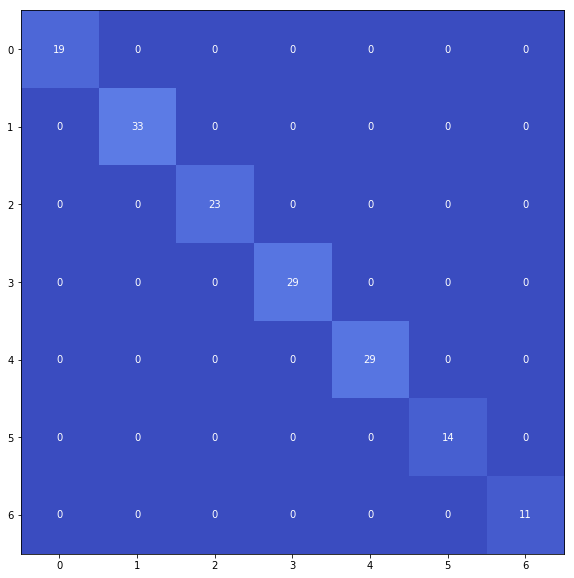

In [242]:
plot_mat(confusion_matrix(y_train, y_train_pred))

In [93]:
confusion_matrix(y_test, y_test_pred)

array([[ 5,  0,  0,  0,  0,  0,  0],
       [ 1, 28,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  1,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  1, 54,  0,  0],
       [ 0,  0,  0,  0,  5, 44,  2],
       [ 0,  0,  0,  0,  0,  2,  3]])

In [94]:

cross_val_score(clf_rf, X_train, y_train, cv=3, scoring="accuracy")


array([0.90405904, 0.94402985, 0.93632959])

##  KNeighborsClassifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_train_pred=clf_knn.predict(X_train)
y_test_pred=clf_knn.predict(X_test)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
cross_val_score(clf_knn, X_train, y_train, cv=3, scoring="accuracy")

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_dtc=DecisionTreeClassifier()
clf_dtc.fit(X_train,y_train)

In [ ]:
y_train_pred=clf_dtc.predict(X_train)
y_test_pred=clf_dtc.predict(X_test)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
confusion_matrix(y_test, y_test_pred)

## ANN

In [237]:
from sklearn.neural_network import MLPClassifier

In [238]:
clf_ann=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 64), random_state=1, max_iter=1000)
clf_ann.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [239]:
y_train_pred=clf_ann.predict(X_train)
y_test_pred=clf_ann.predict(X_test)

#clf_ann.predict_proba(X_test)


In [240]:
confusion_matrix(y_train, y_train_pred)

array([[19,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0],
       [ 0,  0, 23,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0, 11]])

In [241]:
confusion_matrix(y_test, y_test_pred)

array([[  6,   1,   0,   0,   0,   0,   0],
       [  0,  79,  18,   0,   1,   0,   0],
       [  0,   3,  83,   4,   0,   0,   0],
       [  0,   0,   7, 146,   2,   0,   0],
       [  0,   0,   0,   8, 228,  12,   0],
       [  0,   0,   0,   0,  82, 142,   0],
       [  0,   0,   0,   0,   0,   7,  21]])

In [82]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average="macro")

0.9976929812428309

## Using lebel binarizer

In [244]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_b_train = encoder.fit_transform(y_train)
y_b_test = encoder.fit_transform(y_test)
y_b_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
#encoder.inverse_transform(y_b_test)
clb_ann=MLPClassifier()
clb_ann.fit(X_train,y_b_train)

In [ ]:
clf_rf_b=RandomForestClassifier()
clf_rf_b.fit(X_train,y_b_train)

In [ ]:
y_train_pred=clf_rf_b.predict(X_train)
y_test_pred=clf_rf_b.predict(X_test)
y_tr_p=encoder.inverse_transform(y_train_pred)
y_te_p=encoder.inverse_transform(y_test_pred)



y_train_preda=clb_ann.predict(X_train)
y_test_preda=clb_ann.predict(X_test)
y_tr_pa=encoder.inverse_transform(y_train_preda)
y_te_pa=encoder.inverse_transform(y_test_preda)

In [ ]:
confusion_matrix(y_train, y_tr_p)

In [ ]:
confusion_matrix(y_train, y_tr_pa)

In [ ]:
confusion_matrix(y_test, y_te_p)

In [ ]:
confusion_matrix(y_test, y_te_pa)

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf_svc=SVC(gamma=5, C=3)
clf_svc.fit(X_train,y_train)

In [ ]:
y_train_pred=clf_svc.predict(X_train)
y_test_pred=clf_svc.predict(X_test)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
confusion_matrix(y_test, y_test_pred)

## Gaussian NB

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
y_train_pred=clf_nb.predict(X_train)
y_test_pred=clf_nb.predict(X_test)

In [100]:
confusion_matrix(y_test, y_test_pred)

array([[ 5,  0,  0,  0,  0,  0,  0],
       [ 3, 18,  8,  0,  0,  0,  0],
       [ 0,  1, 20,  1,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0, 12, 26, 17,  0],
       [ 0,  0,  0,  0,  2, 46,  3],
       [ 0,  0,  0,  0,  0,  2,  3]])

In [119]:
data=confusion_matrix(y_train, y_train_pred)

array([[ 20,   1,   0,   0,   0,   0,   0],
       [ 14,  70,  17,   0,   1,   0,   0],
       [  3,   3,  84,   1,   0,   0,   0],
       [  0,   0,   7, 142,   0,   0,   0],
       [  0,   0,   0,  42, 101,  79,   0],
       [  0,   0,   0,   0,   9, 176,   2],
       [  0,   0,   0,   0,   0,   0,  34]])

In [245]:
def plot_mat(data):
   
    v=range(0,3000)
    # The normal figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(data,cmap="coolwarm")

    for i in range(len(data)):
        for j in range(len(data)):
            text = ax.text(j, i, data[i, j],ha="center", va="center", color="w")
    im.set_clim(0,100.0)
    #fig.colorbar(im)
    plt.show()
    

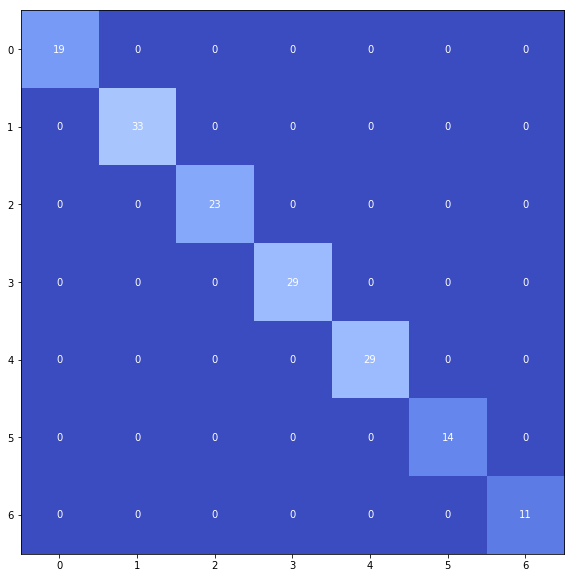

In [246]:
plot_mat(confusion_matrix(y_train, y_train_pred))

NameError: name 'y_train_pred' is not defined